### EDA_Tanja
Careful on:
- "Among the 'Measure' types, 'Personal Vehicle Passengers', 'Bus Passengers','Pedestrians' and 'Train Passengers' count people, whereas the others count vehicles."
- data from 1996 to 2019

**Check data cleaning**

Convert date to date time

In [168]:
# import libraries
import pandas as pd
import numpy as np

In [169]:
# load cleaned data with positions
df = pd.read_csv("../data/DataWithLocationCleaned.zip")
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,"(48.905266, -95.314404)"


In [170]:
# check if date is datetime
df.dtypes
# convert 'Date' to date format
df['Date'] = pd.to_datetime(df['Date'])
# recheck data type of 'Date'
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
position             object
dtype: object

In [171]:
# check number of rows and columns 
df.shape

(349172, 8)

In [172]:
# check recorded date interval
print('First date: ' + str(df.Date.min()))
print('Last date: ' + str(df.Date.max()))

First date: 1996-01-01 00:00:00
Last date: 2019-06-01 00:00:00


**Simple queries**

In [173]:
# check most visited ports from 2018
df[df.Date >= '2018-01-01'].sort_values(['Date', 'Value'], ascending=False).head(5)

,Port Name,State,Port Code,Border,Date,Measure,Value,position
517,San Ysidro,California,2504,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,2176784,"(32.5520013, -117.0430813)"
228,El Paso,Texas,2402,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,1408249,"(31.7600372, -106.487287)"
518,San Ysidro,California,2504,US-Mexico Border,2019-06-01,Personal Vehicles,1246491,"(32.5520013, -117.0430813)"
309,Buffalo-Niagara Falls,New York,901,US-Canada Border,2019-06-01,Personal Vehicle Passengers,1010150,"(43.0761171, -78.9928794)"
506,Otay Mesa,California,2506,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,971669,"(32.560058, -116.9361338)"


In [174]:
# see how many pedestrians crossed the borders from 1996
df.query('Measure == "Pedestrians"').Value.sum()

1056699751

**Simple profiling report**

In [144]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

**Focus on measures**

In [175]:
# check number of unique elements in 'Measure' 
print('Number of different measures : {}' .format(len(df['Measure'].unique())))
df['Measure'].unique()

Number of different measures : 12


array(['Truck Containers Full', 'Truck Containers Empty',
       'Personal Vehicles', 'Personal Vehicle Passengers', 'Pedestrians',
       'Buses', 'Bus Passengers', 'Trucks', 'Trains', 'Train Passengers',
       'Rail Containers Full', 'Rail Containers Empty'], dtype=object)

In [176]:
# number of people or vehicles depending on the measure
df_measure = df[['Measure','Value']].groupby('Measure').sum()
df_measure

,Value
Measure,
Bus Passengers,143388212
Buses,8604318
Pedestrians,1056699751
Personal Vehicle Passengers,5504073464
Personal Vehicles,2584776249
Rail Containers Empty,21477185
Rail Containers Full,38891558
Train Passengers,6287351
Trains,912969


In [177]:
# number of people or vehicles depending on border
df_measure = df[['Border','Value']].groupby(['Border']).sum()
df_measure

,Value
Border,
US-Canada Border,2712940816
US-Mexico Border,7153328223


**Focus on measures for people counting**

In [178]:
# separate measure of people counting
people = df[df['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]


In [179]:
# number of people depending on border
df_people = people[['Border','Value']].groupby('Border').sum()
df_people

,Value
Border,
US-Canada Border,1645990588
US-Mexico Border,5064458190


Text(0.5, 1.0, 'Number of people crossing borders')

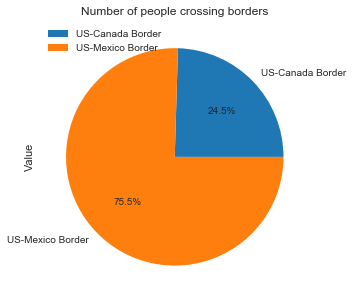

In [186]:
# piechart
df_people_pie = pd.DataFrame({'Value': [1645990588,5064458190]},index=['US-Canada Border', 'US-Mexico Border'])
df_people_pie.plot.pie(subplots=True, figsize=(5, 5),autopct='%1.1f%%')
plt.title('Number of people crossing borders')

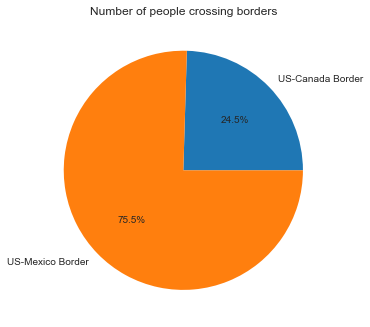

In [187]:
# better piechart
# import useful library
import matplotlib.pyplot as plt
# set parameters
val_p = [1645990588,5064458190]
lab_p = 'US-Canada Border', 'US-Mexico Border'
plt.pie(val_p,labels= lab_p,autopct='%1.1f%%')
plt.title('Number of people crossing borders')
plt.show()

In [188]:
# consider people counting measure, sum value and set date as index
df_date = people[['Date','Border','Value']].set_index('Date')
# group by date and border
df_date = df_date.groupby(['Date', 'Border']).sum()
df_date.head(10)

Value
Date       Border                    
1996-01-01 US-Canada Border   6329802
           US-Mexico Border  17303826
1996-02-01 US-Canada Border   6774801
           US-Mexico Border  16648997
1996-03-01 US-Canada Border   7188110
           US-Mexico Border  18571812
1996-04-01 US-Canada Border   8098225
           US-Mexico Border  18113328
1996-05-01 US-Canada Border   9171578
           US-Mexico Border  18272632

In [13]:
# check number of unique years
years = df['Date'].map(lambda x : x.year).unique()
years

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996])

In [14]:
# consider people counting measure, sum value and set date.year as index
df_date_year = people[['Date','Border','Value']].set_index('Date')
df_date_year.index = pd.to_datetime(df_date_year.index)

# group by date.year and border
df_date_year = df_date_year.groupby([df_date_year.index.year, 'Border']).sum()
df_date_year.head(10)






Value
Date Border                     
1996 US-Canada Border  105762398
     US-Mexico Border  207586832
1997 US-Canada Border   97570223
     US-Mexico Border  261050472
1998 US-Canada Border   93097261
     US-Mexico Border  274125727
1999 US-Canada Border   94573669
     US-Mexico Border  293109831
2000 US-Canada Border   95776909
     US-Mexico Border  290368364

In [25]:
# histogram
# import useful library
# do first pip install plotly==4.3.0 in terminal
import plotly.graph_objects as go


In [26]:
# set parameters
value_m = df_date_year.loc(axis=0)[:,'US-Mexico Border'].values.flatten().tolist()
value_c = df_date_year.loc(axis=0)[:,'US-Canada Border'].values.flatten().tolist()
yrs = df_date_year.unstack(level=1).index.values

# bar chart 
# check if better yrs or years for x...
fig = go.Figure(data=[
    go.Bar(name='US-Mexico Border', x= yrs, y= value_m), 
    go.Bar(name='US-Canada Border', x= yrs, y= value_c)
])
# change the bar mode
fig.update_layout(title = 'People entering US by years and borders', barmode='group')
fig.show()

In [28]:
# consider people counting measure, sum values and set date as index
df_dm = people[['Date','Measure','Value']].set_index('Date')
df_dm.index = pd.to_datetime(df_dm.index)
# group by date.years and border
df_dm = df_dm.groupby([df_dm.index.year,'Measure']).sum()
df_dm.head(10)

Value
Date Measure                               
1996 Bus Passengers                 5813778
     Pedestrians                   34717351
     Personal Vehicle Passengers  272593220
     Train Passengers                224881
1997 Bus Passengers                 6896919
     Pedestrians                   44461186
     Personal Vehicle Passengers  307001980
     Train Passengers                260610
1998 Bus Passengers                 7608484
     Pedestrians                   45060023

In [29]:
# stacked bar chart 
# set parameters
value_bp = df_dm.loc(axis=0)[:,'Bus Passengers'].values.flatten().tolist()
value_ped = df_dm.loc(axis=0)[:,'Pedestrians'].values.flatten().tolist()
value_pvp = df_dm.loc(axis=0)[:,'Personal Vehicle Passengers'].values.flatten().tolist()
value_tp = df_dm.loc(axis=0)[:,'Train Passengers'].values.flatten().tolist()
# check if better yrs or years for x...
fig = go.Figure(data=[
    go.Bar(name='Bus Passengers', x= yrs, y= value_bp), 
    go.Bar(name='Pedestrians', x= yrs, y= value_ped),
    go.Bar(name='Personal Vehicle Passengers', x= yrs, y= value_pvp),
    go.Bar(name='Train Passengers', x= yrs, y= value_tp)
])
# change the bar mode
fig.update_layout(title = 'People entering US by years and measures', barmode='stack')
fig.show()

In [ ]:

# -> output 27

**Vehicles**

In [7]:
# separate measure of vehicules counting
veh = df[df['Measure'].isin(['Truck Containers Full', 'Truck Containers Empty','Personal Vehicles', 'Buses', 'Trucks', 'Trains', 'Rail Containers Full', 'Rail Containers Empty'])]



In [8]:
# number of vehicule depending on border
df_veh = veh[['Border','Value']].groupby('Border').sum()
df_veh

,Value
Border,
US-Canada Border,1066950228
US-Mexico Border,2088870033


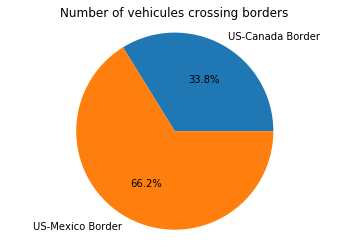

In [10]:
# better piechart
# import useful library
import matplotlib.pyplot as plt
# set parameters
Value_veh = [1066950228,2088870033]
my_labels = 'US-Canada Border', 'US-Mexico Border'
plt.pie(Value_veh,labels=my_labels,autopct='%1.1f%%')
plt.title('Number of vehicules crossing borders')
plt.axis('equal')
plt.show()

In [19]:
# consider vehicles counting measure, sum value and set date.year as index
df_date_year_v = veh[['Date','Border','Value']].set_index('Date')
df_date_year_v.index = pd.to_datetime(df_date_year_v.index)

# group by date.year and border
df_date_year_v = df_date_year_v.groupby([df_date_year_v.index.year, 'Border']).sum()
df_date_year_v.head(10)

Value
Date Border                     
1996 US-Canada Border   47276505
     US-Mexico Border   69164616
1997 US-Canada Border   47942487
     US-Mexico Border   87611016
1998 US-Canada Border   49196829
     US-Mexico Border   92170887
1999 US-Canada Border   51923659
     US-Mexico Border   98849565
2000 US-Canada Border   52012764
     US-Mexico Border  101863505

In [12]:
# histogram
# import useful library
# do first pip install plotly==4.3.0 in terminal
import plotly.graph_objects as go

In [20]:
# set parameters
value_m = df_date_year_v.loc(axis=0)[:,'US-Mexico Border'].values.flatten().tolist()
value_c = df_date_year_v.loc(axis=0)[:,'US-Canada Border'].values.flatten().tolist()
yrs = df_date_year_v.unstack(level=1).index.values

# bar chart 
# check if better yrs or years for x...
fig = go.Figure(data=[
    go.Bar(name='US-Mexico Border', x= yrs, y= value_m), 
    go.Bar(name='US-Canada Border', x= yrs, y= value_c)
])
# change the bar mode
fig.update_layout(title = 'Vehicles entering US by years and borders', barmode='group')
fig.show()

In [21]:
# consider vehicle counting measure, sum values and set date as index
df_dm_v = veh[['Date','Measure','Value']].set_index('Date')
df_dm_v.index = pd.to_datetime(df_dm_v.index)
# group by date.years and border
df_dm_v = df_dm_v.groupby([df_dm_v.index.year,'Measure']).sum()
df_dm_v.head(10)

Value
Date Measure                          
1996 Buses                      292789
     Personal Vehicles       101960373
     Rail Containers Empty      268134
     Rail Containers Full       472219
     Trains                      38966
     Truck Containers Empty    1599429
     Truck Containers Full     3124031
     Trucks                    8685180
1997 Buses                      389969
     Personal Vehicles       119003203

In [22]:
# stacked bar chart 
# set parameters
value_b = df_dm_v.loc(axis=0)[:,'Buses'].values.flatten().tolist()
value_tk = df_dm_v.loc(axis=0)[:,'Trucks'].values.flatten().tolist()
value_tke = df_dm_v.loc(axis=0)[:,'Truck Containers Empty'].values.flatten().tolist()
value_tkf = df_dm_v.loc(axis=0)[:,'Truck Containers Full'].values.flatten().tolist()
value_pv = df_dm_v.loc(axis=0)[:,'Personal Vehicles'].values.flatten().tolist()
value_tr = df_dm_v.loc(axis=0)[:,'Trains'].values.flatten().tolist()
value_tre = df_dm_v.loc(axis=0)[:,'Rail Containers Empty'].values.flatten().tolist()
value_trf = df_dm_v.loc(axis=0)[:,'Rail Containers Full'].values.flatten().tolist()
# check if better yrs or years for x...
fig = go.Figure(data=[
    go.Bar(name='Buses', x= yrs, y= value_b), 
    go.Bar(name='Trucks', x= yrs, y= value_tk),
    go.Bar(name='Truck Containers Empty', x= yrs, y= value_tke),
    go.Bar(name='Truck Containers Full', x= yrs, y= value_tkf),
    go.Bar(name='Personal Vehicles', x= yrs, y= value_pv),
    go.Bar(name='Trains', x= yrs, y= value_tr),
    go.Bar(name='Rail Containers Empty', x= yrs, y= value_tre),
    go.Bar(name='Rail Containers Full', x= yrs, y= value_trf)
])
# change the bar mode
fig.update_layout(title = 'Vehicles entering US by years and measures', barmode='stack')
fig.show()

All measures

                        Measure       Value
0   Personal Vehicle Passengers  5504073464
1             Personal Vehicles  2584776249
2                   Pedestrians  1056699751
3                        Trucks   256762423
4         Truck Containers Full   179543288
5                Bus Passengers   143388212
6        Truck Containers Empty    64852271
7          Rail Containers Full    38891558
8         Rail Containers Empty    21477185
9                         Buses     8604318
10             Train Passengers     6287351
11                       Trains      912969


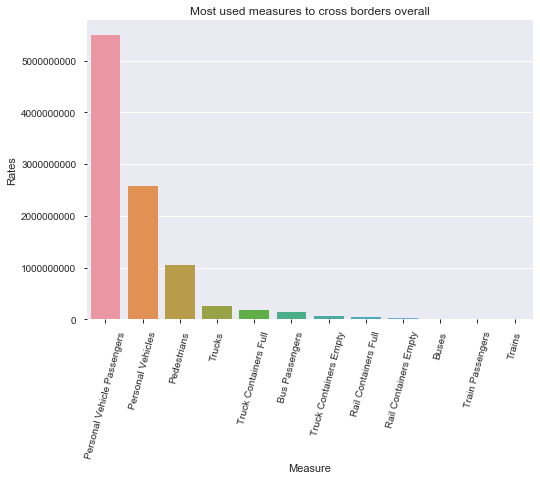

In [162]:
temp = pd.DataFrame(df.groupby(by='Measure')['Value'].sum().sort_values(ascending=False)).reset_index()
print(temp)

plt.figure()
sns.barplot(x=temp['Measure'],y=temp['Value'])
plt.title('Most used measures to cross borders overall')
plt.ylabel('Rates')
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis='y')

del temp

** Careful on combining Empty/Full Trucks or Trains**


**Comparison between Canada and Mexico**

Test à partir de Kaggle

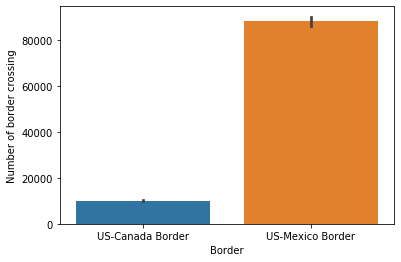

In [32]:
import seaborn as sns
sns.barplot(x=df['Border'],y=df['Value'])

plt.ylabel('Number of border crossing')

plt.show()

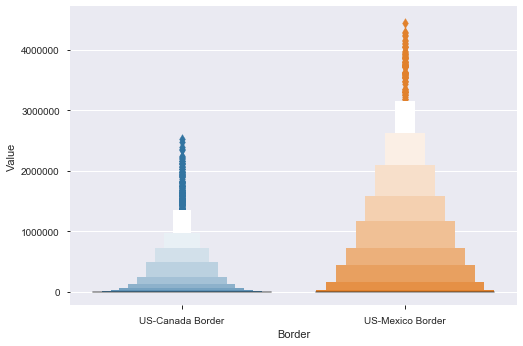

In [146]:
sns.boxenplot(x="Border", y="Value", scale="linear", data=df)
plt.show()

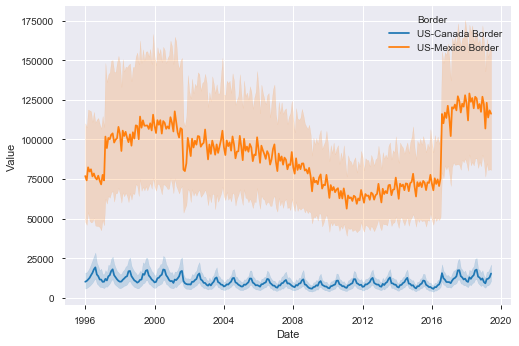

In [147]:
sns.lineplot(x='Date',y='Value',hue="Border",data=df)
plt.show()

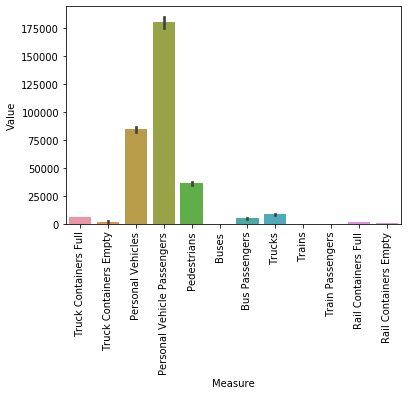

In [34]:
sns.barplot(x='Measure',y='Value',data=df)
plt.xticks(rotation=90)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

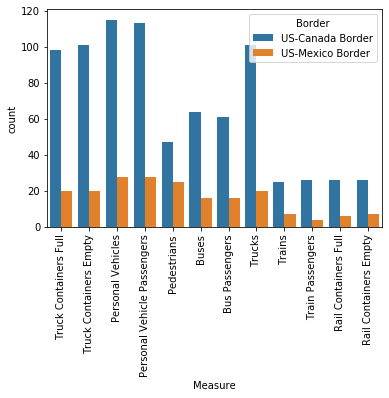

In [95]:
fig =sns.countplot(df['Measure'],hue='Border',data=df)
plt.xticks(rotation=90)



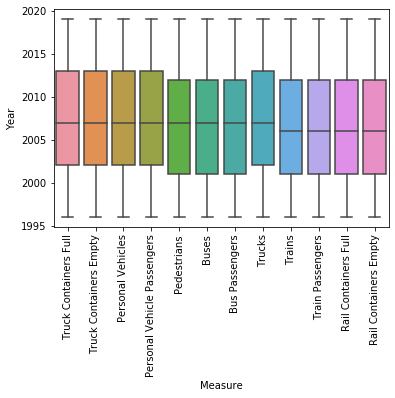

In [36]:
df['Year']=pd.DatetimeIndex(df['Date']).year
sns.boxplot(x='Measure',y='Year',data=df)
plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Measure Values Through Years')

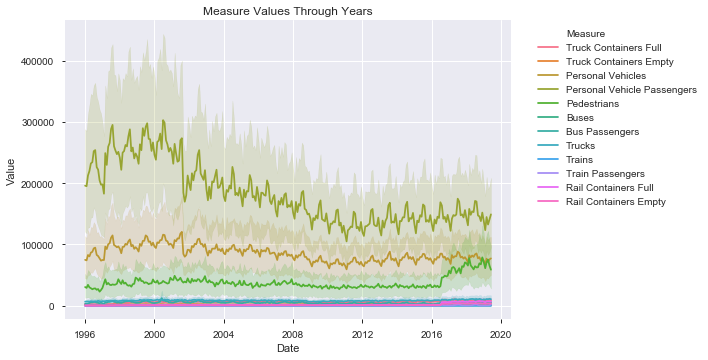

In [155]:
# subplots
plt.figure()
sns.lineplot(data = df, x='Date', y='Value', hue='Measure',legend='full')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Measure Values Through Years')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a453eb048>,
      dtype=object)

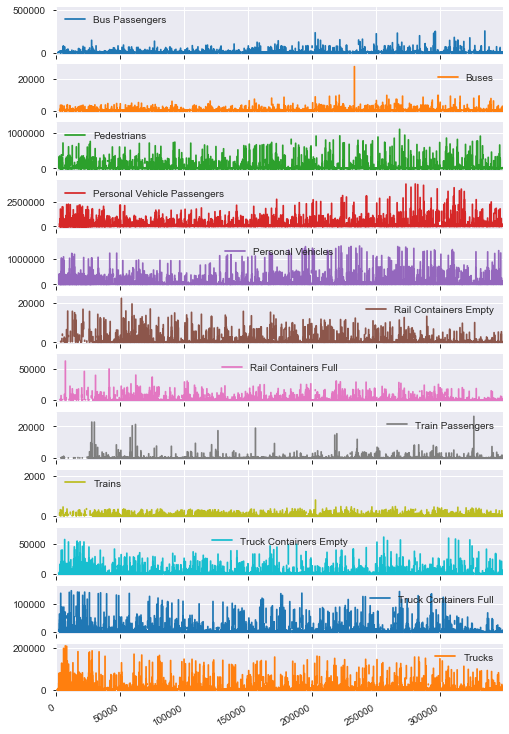

In [158]:
df.pivot(columns="Measure", values="Value").plot(subplots=True, figsize=(8,14))

In [38]:
# pip install folium
import folium
world_map =folium.Map(location=[37.09, -95.71],zoom_start=4)
world_map

In [ ]:
# Spatial and Temporal Analysis on kaggle kernel

In [40]:
df['position']

0                 (48.905266, -95.314404)
1                 (48.905266, -95.314404)
2                 (48.905266, -95.314404)
3                 (48.905266, -95.314404)
4                 (48.905266, -95.314404)
5                 (48.905266, -95.314404)
6                 (48.905266, -95.314404)
7               (48.7710371, -95.7697882)
8               (48.7710371, -95.7697882)
9               (48.7710371, -95.7697882)
10              (48.7710371, -95.7697882)
11              (48.7710371, -95.7697882)
12              (48.7710371, -95.7697882)
13              (48.7710371, -95.7697882)
14              (42.3315509, -83.0466403)
15              (42.3315509, -83.0466403)
16              (42.3315509, -83.0466403)
17              (29.3627296, -100.896761)
18              (29.3627296, -100.896761)
19              (29.3627296, -100.896761)
20             (48.5020123, -122.6237356)
21             (48.5020123, -122.6237356)
22        (48.9950874, -122.269080593315)
23        (48.9950874, -122.269080

In [41]:
df =df.iloc[:1000,:]
df.shape
df['Port Name']

0        Warroad
1        Warroad
2        Warroad
3        Warroad
4        Warroad
5        Warroad
6        Warroad
7         Roseau
8         Roseau
9         Roseau
10        Roseau
11        Roseau
12        Roseau
13        Roseau
14       Detroit
15       Detroit
16       Detroit
17       Del Rio
18       Del Rio
19       Del Rio
20     Anacortes
21     Anacortes
22         Sumas
23         Sumas
24         Sumas
25         Sumas
26         Sumas
27         Sumas
28         Sumas
29         Sumas
         ...    
970        Maida
971        Maida
972        Maida
973        Maida
974        Neche
975        Neche
976        Neche
977        Neche
978        Neche
979       Noonan
980       Noonan
981       Noonan
982       Noonan
983       Noonan
984    Northgate
985    Northgate
986    Northgate
987    Northgate
988    Northgate
989    Northgate
990    Northgate
991    Northgate
992    Northgate
993     Baudette
994     Baudette
995     Baudette
996     Baudette
997     Baudet

In [43]:
#Create entry_map for plotting
entry_map =folium.Map(location=[37.09, -95.71],zoom_start=4)
entry_map

In [45]:
from folium import plugins

cluster_map = folium.Map(location = [37.09, -95.71], zoom_start = 4)

entries = plugins.MarkerCluster().add_to(cluster_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df['position'][0], df['position'][1], df['Port Name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(entries)

# display map
cluster_map

ValueError: Location should consist of two numerical values, but '(' of type <class 'str'> is not convertible to float.

In [58]:
# problem with port code
df_state = df.groupby('State').sum()
df_state = df_state.drop(columns=['Port Code'])
df_state

,Value
State,
Alaska,167292
Arizona,2583220
California,9279563
Idaho,86295
Maine,568538
Michigan,2987501
Minnesota,456620
Montana,377024
New Mexico,463246


In [53]:
df['Port Code'].unique()

array([3423, 3426, 3801, 2302, 3010, 3009, 3007, 3017, 3019, 3011, 3025,
       3023, 3016, 3020, 3014, 3013, 3012, 3015, 3004,  203,  211,  212,
        209,  206, 2404, 2310, 2307, 2309, 2403, 2304, 2305, 2402, 2303,
       2301, 2410, 4105,  715,  701,  704,  712,  706,  901,  708, 2408,
       2406, 3419, 3407, 3405, 3414, 3409, 3403, 3401, 3425, 3430, 3604,
       3613, 3104, 3106, 3102, 3103, 2601, 2602, 2603, 2604, 2608, 2606,
       2502, 2503, 2507, 2582, 2506, 2504, 2505, 3302, 3308,  127,  115,
        103,  107,  110,  106,  104,  118,  109,  108,  105, 3814, 3802,
       3803, 3424, 3406, 3420, 3404, 3416, 3415, 3408, 3417, 3422, 3421,
       3413, 3410, 3325, 3323, 3321, 3306, 3310, 3309, 3318, 3301, 3316,
       3317, 3319, 3322])

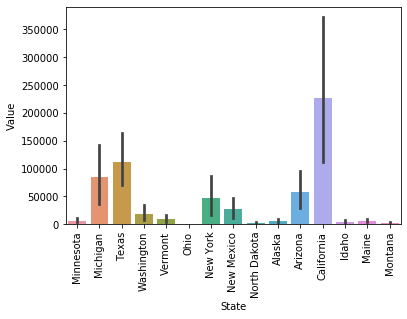

In [76]:
sns.barplot(x='State',y='Value',data=df)
plt.xticks(rotation=90)

plt.show()

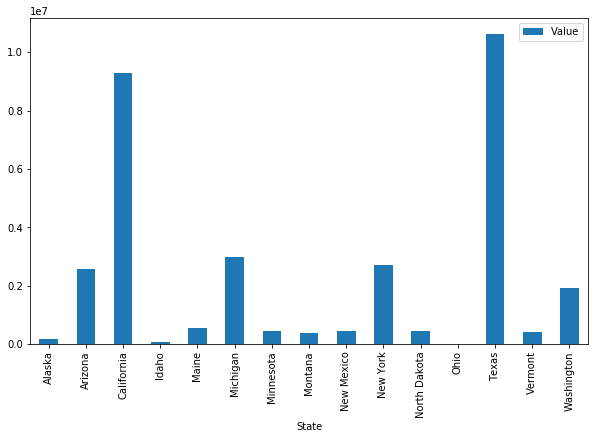

In [73]:
df_state.plot(kind='bar', figsize=(10, 6), rot=90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

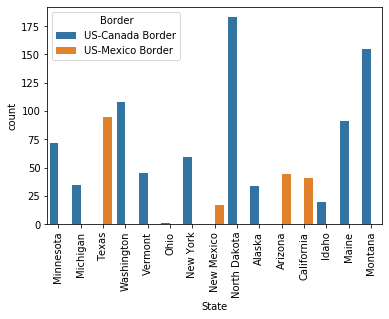

In [96]:
fig =sns.countplot(df['State'],hue='Border',data=df)
plt.xticks(rotation=90)

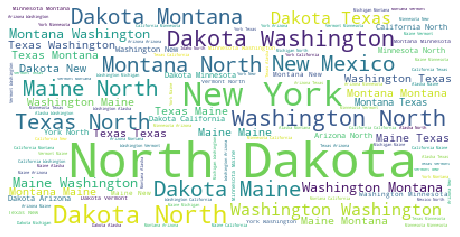

In [154]:
from wordcloud import WordCloud
text = " ".join(str(each) for each in df.State)
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [70]:
df_port = df.groupby('Port Name').sum()
df_port.head()

,Port Code,Value
Port Name,,
Alcan,34144,42898
Alexandria Bay,4956,207379
Algonac,3814,4609
Ambrose,20460,567
Anacortes,6020,11786


In [71]:
df_port = df_port.sort_values(['Value'],ascending=[0])
df_port.head()

,Port Code,Value
Port Name,,
San Ysidro,12520,4351210
El Paso,28824,3045989
Detroit,41811,2191846
Laredo,25344,2103190
Otay Mesa,27566,1975461


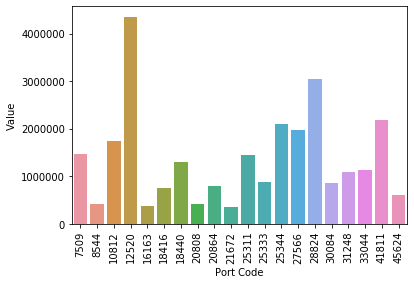

In [72]:
df_port =df_port.iloc[:20,:]
sns.barplot(x='Port Code',y='Value',data=df_port)
plt.xticks(rotation=90)
plt.show()

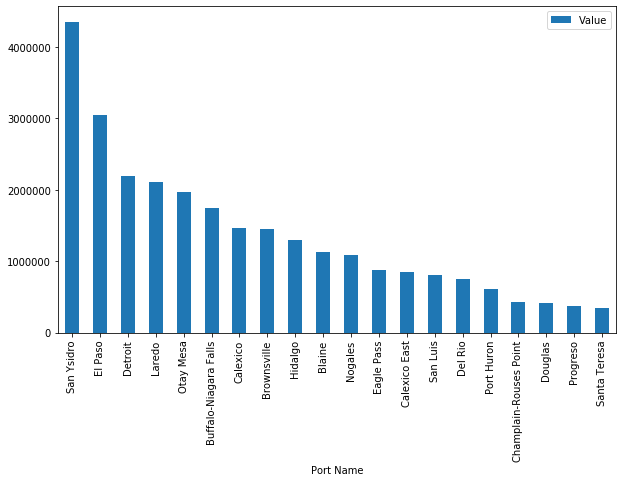

In [75]:
df_port = df_port.drop(columns=['Port Code'])
df_port.plot(kind='bar', figsize=(10, 6), rot=90) 